# TESTING WITH MULTI ARMED BANDIT

This jupyter gives you a simple example of how you should use the Simulated Network (asynchronous) environment. This environment is not meant as a training ground of your algorithms, but only to check whether or not your algorithm can be executed and if it is fast enough to create a response in time. (Set stim_period = 100 to be sure).

In [1]:
import gymnasium as gym
import numpy as np

# Add parent directory to path
import sys
from pathlib import Path
current_dir = Path().resolve()
root_dir = current_dir.parent
if str(root_dir) not in sys.path:
    sys.path.insert(0,str(root_dir))

from Gyms.SimulatedNetworkSync import SimulatedNetworkSync

from Reward.TrainingReward import TrainingReward

In [2]:
# Define size of state and action spaces, as well as stimulation period
state_dim   = 4   # Dimension of reduced state space
action_dim  = 5   # Number of stimuli in action space. Must be less or equal to 5 (each stimulus needs a value of {0,1,2,3,4}
stim_period = 250 # stimulation period, meaning that an action is applied every {stim_period} ms

In [3]:
# Create environment and initialize it
env      = SimulatedNetworkSync(action_dim=action_dim,state_dim=state_dim,stim_period=stim_period)
state, _ = env.reset()
env.render() # This function gives you the current state + reward, which both is 0 after initialization

Current state: [0. 0. 0. 0.], Reward: 0


In [4]:
from Algorithms.MultiArmedBandit import MABAgent, MAB_STRATEGIES  # Update path if needed

# Initialize MAB agent
agent = MABAgent(
    epsilon=0.9,            # Initial exploration rate (90% random actions)
    alpha=0.1,              # Learning rate (constant step-size)
    initial_q=0.0,          # Optimistic initial values
    n_actions=125,           # Number of actions, should be a power of 5
)

In [5]:
# Example code, that stimulates the network 10_000 times with a randomly sampled action, while calculating also the average reward received

total_reward = 0
action_count = 0

rewards_over_time = []

for _ in range(10):
    # For simplicity, choose a random action
    action_idx = agent.select_action()
    action = agent.action_map(action_idx)
    print(f"Stimulate with action: {action}")
    
    state, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    action_count += 1

    rewards_over_time.append(reward)

    agent.update(action_idx, reward)

    # Plot information
    print(f"Info: {info}, reward: {reward}")

    print("-----------------------------")

    if _ % 100 == 0:
        print(f"Step: {_}, Action: {action}, Reward: {reward}, Total reward: {total_reward}, Average reward: {total_reward/action_count}")

Stimulate with action: [0 0 0 0 4]
Info: {'spikes': array([19.29614831, 19.9999    ]), 'elecs': array([3, 0]), 'action': array([0, 0, 0, 0, 4]), 'missed_cyc': 0, 'stim_id': 1, 'simulated': True, 'comment': 'none'}, reward: 0
-----------------------------
Step: 0, Action: [0 0 0 0 4], Reward: 0, Total reward: 0, Average reward: 0.0
Stimulate with action: [0 0 0 0 0]
Info: {'spikes': [], 'elecs': [], 'action': array([0, 0, 0, 0, 0]), 'missed_cyc': 0, 'stim_id': 2, 'simulated': True, 'comment': 'none'}, reward: 0
-----------------------------
Stimulate with action: [0 0 0 2 0]
Info: {'spikes': array([17.44708465, 19.90770603]), 'elecs': array([1, 2]), 'action': array([0, 0, 0, 2, 0]), 'missed_cyc': 0, 'stim_id': 3, 'simulated': True, 'comment': 'none'}, reward: 0
-----------------------------
Stimulate with action: [0 0 0 1 0]
Info: {'spikes': array([16.20684233, 19.9999    ]), 'elecs': array([0, 1]), 'action': array([0, 0, 0, 1, 0]), 'missed_cyc': 0, 'stim_id': 4, 'simulated': True, 'com

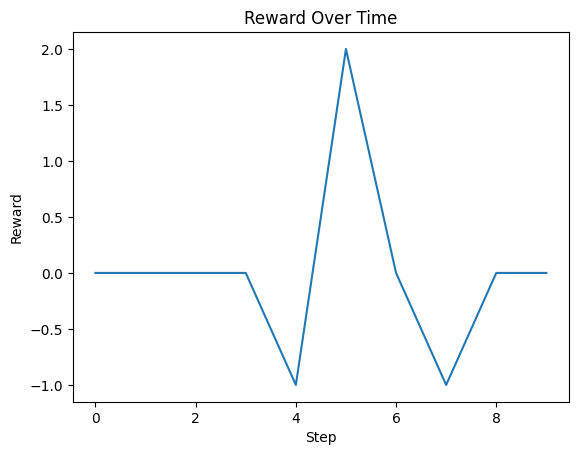

In [6]:
import matplotlib.pyplot as plt

plt.plot(rewards_over_time)
plt.xlabel('Step')
plt.ylabel('Reward')
plt.title('Reward Over Time')
plt.show()

In [7]:
print(f"Average reward: {total_reward/action_count}")

Average reward: 0.0
